In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import regionmask
from geocat.comp import eofunc_eofs, eofunc_pcs
import pdo_functions

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('default')
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.weight'] = 'light'
rcParams['mathtext.fontset'] = 'cm'
rcParams['mathtext.rm'] = 'serif'
mpl.rcParams["figure.dpi"] = 500
import cartopy.crs as ccrs
import cartopy as ct
import matplotlib.colors as c
import cmasher as cmr
mpl.rcParams['hatch.linewidth'] = 0.5
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pdo_functions
import importlib
importlib.reload(pdo_functions)
import glob
import re
import matplotlib.gridspec as gridspec

In [43]:
# want to make sure that all the files are in the right order
sst_file_list_1850s = sorted(glob.glob('/hurrell-scratch2/ivyglade/pdo/CESM2LE/regridded_SST/b.e21.BHISTcmip6.f09_g17.LE2-*.pop.h.regridded_SST.185001-185912.nc'))
sst_file_list_1860s = sorted(glob.glob('/hurrell-scratch2/ivyglade/pdo/CESM2LE/regridded_SST/b.e21.BHISTcmip6.f09_g17.LE2-*.pop.h.regridded_SST.186001-186912.nc'))
sst_file_list_1870s = sorted(glob.glob('/hurrell-scratch2/ivyglade/pdo/CESM2LE/regridded_SST/b.e21.BHISTcmip6.f09_g17.LE2-*.pop.h.regridded_SST.187001-187912.nc'))
sst_file_list_1880s = sorted(glob.glob('/hurrell-scratch2/ivyglade/pdo/CESM2LE/regridded_SST/b.e21.BHISTcmip6.f09_g17.LE2-*.pop.h.regridded_SST.188001-188912.nc'))
sst_file_list_1890s = sorted(glob.glob('/hurrell-scratch2/ivyglade/pdo/CESM2LE/regridded_SST/b.e21.BHISTcmip6.f09_g17.LE2-*.pop.h.regridded_SST.189001-189912.nc'))
sst_file_list_1900s = sorted(glob.glob('/hurrell-scratch2/ivyglade/pdo/CESM2LE/regridded_SST/b.e21.BHISTcmip6.f09_g17.LE2-*.pop.h.regridded_SST.190001-190912.nc'))
sst_file_list_1910s = sorted(glob.glob('/hurrell-scratch2/ivyglade/pdo/CESM2LE/regridded_SST/b.e21.BHISTcmip6.f09_g17.LE2-*.pop.h.regridded_SST.191001-191912.nc'))
sst_file_list_1920s = sorted(glob.glob('/hurrell-scratch2/ivyglade/pdo/CESM2LE/regridded_SST/b.e21.BHISTcmip6.f09_g17.LE2-*.pop.h.regridded_SST.192001-192912.nc'))
sst_file_list_1930s = sorted(glob.glob('/hurrell-scratch2/ivyglade/pdo/CESM2LE/regridded_SST/b.e21.BHISTcmip6.f09_g17.LE2-*.pop.h.regridded_SST.193001-193912.nc'))
sst_file_list_1940s = sorted(glob.glob('/hurrell-scratch2/ivyglade/pdo/CESM2LE/regridded_SST/b.e21.BHISTcmip6.f09_g17.LE2-*.pop.h.regridded_SST.194001-194912.nc'))
sst_file_list_1950s = sorted(glob.glob('/hurrell-scratch2/ivyglade/pdo/CESM2LE/regridded_SST/b.e21.BHISTcmip6.f09_g17.LE2-*.pop.h.regridded_SST.195001-195912.nc'))
sst_file_list_1960s = sorted(glob.glob('/hurrell-scratch2/ivyglade/pdo/CESM2LE/regridded_SST/b.e21.BHISTcmip6.f09_g17.LE2-*.pop.h.regridded_SST.196001-196912.nc'))
sst_file_list_1970s = sorted(glob.glob('/hurrell-scratch2/ivyglade/pdo/CESM2LE/regridded_SST/b.e21.BHISTcmip6.f09_g17.LE2-*.pop.h.regridded_SST.197001-197912.nc'))
sst_file_list_1980s = sorted(glob.glob('/hurrell-scratch2/ivyglade/pdo/CESM2LE/regridded_SST/b.e21.BHISTcmip6.f09_g17.LE2-*.pop.h.regridded_SST.198001-198912.nc'))
sst_file_list_1990s = sorted(glob.glob('/hurrell-scratch2/ivyglade/pdo/CESM2LE/regridded_SST/b.e21.BHISTcmip6.f09_g17.LE2-*.pop.h.regridded_SST.199001-199912.nc'))
sst_file_list_2000s = sorted(glob.glob('/hurrell-scratch2/ivyglade/pdo/CESM2LE/regridded_SST/b.e21.BHISTcmip6.f09_g17.LE2-*.pop.h.regridded_SST.200001-200912.nc'))
sst_file_list_2010s = sorted(glob.glob('/hurrell-scratch2/ivyglade/pdo/CESM2LE/regridded_SST/b.e21.BHISTcmip6.f09_g17.LE2-*.pop.h.regridded_SST.201001-201412.nc'))

In [44]:
# Open datasets
sst_1850_1859 = xr.open_mfdataset(sst_file_list_1850s, combine='nested', concat_dim='ens')['__xarray_dataarray_variable__']
sst_1860_1869 = xr.open_mfdataset(sst_file_list_1860s, combine='nested', concat_dim='ens')['__xarray_dataarray_variable__']
sst_1870_1879 = xr.open_mfdataset(sst_file_list_1870s, combine='nested', concat_dim='ens')['__xarray_dataarray_variable__']
sst_1880_1889 = xr.open_mfdataset(sst_file_list_1880s, combine='nested', concat_dim='ens')['__xarray_dataarray_variable__']
sst_1890_1899 = xr.open_mfdataset(sst_file_list_1890s, combine='nested', concat_dim='ens')['__xarray_dataarray_variable__']
sst_1900_1909 = xr.open_mfdataset(sst_file_list_1900s, combine='nested', concat_dim='ens')['__xarray_dataarray_variable__']
sst_1910_1919 = xr.open_mfdataset(sst_file_list_1910s, combine='nested', concat_dim='ens')['__xarray_dataarray_variable__']
sst_1920_1929 = xr.open_mfdataset(sst_file_list_1920s, combine='nested', concat_dim='ens')['__xarray_dataarray_variable__']
sst_1930_1939 = xr.open_mfdataset(sst_file_list_1930s, combine='nested', concat_dim='ens')['__xarray_dataarray_variable__']
sst_1940_1949 = xr.open_mfdataset(sst_file_list_1940s, combine='nested', concat_dim='ens')['__xarray_dataarray_variable__']
sst_1950_1959 = xr.open_mfdataset(sst_file_list_1950s, combine='nested', concat_dim='ens')['__xarray_dataarray_variable__']
sst_1960_1969 = xr.open_mfdataset(sst_file_list_1960s, combine='nested', concat_dim='ens')['__xarray_dataarray_variable__']
sst_1970_1979 = xr.open_mfdataset(sst_file_list_1970s, combine='nested', concat_dim='ens')['__xarray_dataarray_variable__']
sst_1980_1989 = xr.open_mfdataset(sst_file_list_1980s, combine='nested', concat_dim='ens')['__xarray_dataarray_variable__']
sst_1990_1999 = xr.open_mfdataset(sst_file_list_1990s, combine='nested', concat_dim='ens')['__xarray_dataarray_variable__']
sst_2000_2009 = xr.open_mfdataset(sst_file_list_2000s, combine='nested', concat_dim='ens')['__xarray_dataarray_variable__']
sst_2010_2014 = xr.open_mfdataset(sst_file_list_2010s, combine='nested', concat_dim='ens')['__xarray_dataarray_variable__']

In [45]:
# Concatenate datasets
sst_le = xr.concat([sst_1850_1859, sst_1860_1869, sst_1870_1879, sst_1880_1889, sst_1890_1899, sst_1900_1909, \
                    sst_1910_1919, sst_1920_1929, sst_1930_1939, sst_1940_1949, sst_1950_1959, sst_1960_1969, \
                    sst_1970_1979, sst_1980_1989, sst_1990_1999, sst_2000_2009, sst_2010_2014], dim='time').sel(z_t=500).load()

In [46]:
def pdo_from_CESM2LE(sst, first_base_year, last_base_year):
    ## Input is SST data from the CESM2LE with shape (time, lat, lon)
    # Need time shift the time dimension by one month
    new_time = pd.date_range('1850-01', '2015-01', freq='ME')
    
    sst['time'] = new_time

    # define and apply a land mask
    land_110 = regionmask.defined_regions.natural_earth_v4_1_0.land_110
    land = xr.where(land_110.mask_3D(sst['lon'], sst['lat'])==False, 1, np.nan).squeeze()
    
    sst_no_land = sst*land

    # Subset base period and then create a monthly climatology and remove the seasonal cycle
    base_period = sst_no_land.sel(time=sst_no_land.time.dt.year.isin(np.arange(first_base_year, last_base_year+1, 1)))
    
    climo = base_period.groupby('time.month').mean(skipna=True)
    
    sst_no_land_anoms = sst_no_land.groupby('time.month') - climo

    # Calculate global mean SST for each month and remove that from the spatial plot to detrend
    sst_global_mean = sst_no_land_anoms.sel(lat=slice(-60, 70)).weighted(np.cos(np.deg2rad(sst_no_land_anoms.sel(lat=slice(-60, 70)).lat))).mean(dim=('lat', 'lon'), skipna=True)
    
    sst_no_land_anoms_de = sst_no_land_anoms - sst_global_mean

    # Subset PDO region
    sst_no_land_anoms_de_pdo = sst_no_land_anoms_de.sel(lat=slice(20, 70)).sel(lon=slice(110, pdo_functions.convert_longitudes(-100)))

    # Weight the PDO region by the sqrt of the cosine of the latitude
    sst_no_land_anoms_de_pdo_wgt = sst_no_land_anoms_de_pdo * np.sqrt(np.cos(np.deg2rad(sst_no_land_anoms_de_pdo.lat)))

    # EOF analysis
    eof = eofunc_eofs(sst_no_land_anoms_de_pdo_wgt, neofs=1)
    
    eof_reshape = np.reshape((eof[0].values), 53*121)
    
    ssta_tseries_reshape = np.reshape(sst_no_land_anoms_de_pdo_wgt.transpose('lat', 'lon', 'time').values, (53*121, 1980))
    
    pcs = eofunc_pcs(sst_no_land_anoms_de_pdo.data, npcs=1)

    # Standardize the PC
    standard_pcs = (pcs[0] - pcs[0].mean()) / pcs[0].std()

    return [standard_pcs, sst_no_land_anoms_de]

In [47]:
pdo_pcs = np.zeros((50, 1980))
sst_anoms = np.zeros((50, 1980, 192, 288))
for i in range(50):
    pdo_pcs[i], sst_anoms[i] = pdo_from_CESM2LE(sst_le.isel(ens=i), 1980, 2010)

    print(f'ensemble member {i+1} is complete.')

ensemble member 1 is complete.
ensemble member 2 is complete.
ensemble member 3 is complete.
ensemble member 4 is complete.
ensemble member 5 is complete.
ensemble member 6 is complete.
ensemble member 7 is complete.
ensemble member 8 is complete.
ensemble member 9 is complete.
ensemble member 10 is complete.
ensemble member 11 is complete.
ensemble member 12 is complete.
ensemble member 13 is complete.
ensemble member 14 is complete.
ensemble member 15 is complete.
ensemble member 16 is complete.
ensemble member 17 is complete.
ensemble member 18 is complete.
ensemble member 19 is complete.
ensemble member 20 is complete.
ensemble member 21 is complete.
ensemble member 22 is complete.
ensemble member 23 is complete.
ensemble member 24 is complete.
ensemble member 25 is complete.
ensemble member 26 is complete.
ensemble member 27 is complete.
ensemble member 28 is complete.
ensemble member 29 is complete.
ensemble member 30 is complete.
ensemble member 31 is complete.
ensemble member 3

In [101]:
# Need to multiply some of the PCs by -1
pdo_pcs_mult = np.zeros((50, 1980))
for i in range(50):
    if (i==0) or (i==3) or (i==6) or (i==9) or (i==12) or (i==14) or (i==15) or (i==30) or (i==31) or (i==32) or (i==33) or (i==34) or (i==35) or (i==36) or \
    (i==37) or (i==38) or (i==39) or (i==46) or (i==48) or (i==49):
        pdo_pcs_mult[i] = pdo_pcs[i]*-1

    else:
        pdo_pcs_mult[i] = pdo_pcs[i]

In [102]:
# Convert PDO index and SST anomaly datasets to XR
pdo_pcs_xr = xr.DataArray(pdo_pcs_mult, coords={'ens':np.arange(1, 51, 1), 'time':sst_le['time']}, dims=['ens', 'time'])
sst_anoms_xr = xr.DataArray(sst_anoms, coords={'ens':np.arange(1, 51, 1), 'time':sst_le['time'], 'lat':sst_le['lat'], 'lon':sst_le['lon']}, dims=['ens', 'time', 'lat', 'lon'])

In [103]:
# Save as a netcdf
pdo_pcs_xr.to_netcdf('/hurrell-scratch2/ivyglade/pdo/CESM2LE/cesm2_le_pdo_index.nc')
# sst_anoms_xr.to_netcdf('/hurrell-scratch2/ivyglade/pdo/CESM2LE/cesm2_le_sst_anoms_1850-2014.nc')

In [104]:
# Getting the spatial pattern of the PDO
pdo_pattern = np.zeros((50, 192, 288))
for i in range(50):
    pdo_pattern[i] = pdo_functions.linregress_3D(pdo_pcs_mult[i], sst_anoms[i])[2]

    print(f'ensemble member {i+1} is complete.')

ensemble member 1 is complete.
ensemble member 2 is complete.
ensemble member 3 is complete.
ensemble member 4 is complete.
ensemble member 5 is complete.
ensemble member 6 is complete.
ensemble member 7 is complete.
ensemble member 8 is complete.
ensemble member 9 is complete.
ensemble member 10 is complete.
ensemble member 11 is complete.
ensemble member 12 is complete.
ensemble member 13 is complete.
ensemble member 14 is complete.
ensemble member 15 is complete.
ensemble member 16 is complete.
ensemble member 17 is complete.
ensemble member 18 is complete.
ensemble member 19 is complete.
ensemble member 20 is complete.
ensemble member 21 is complete.
ensemble member 22 is complete.
ensemble member 23 is complete.
ensemble member 24 is complete.
ensemble member 25 is complete.
ensemble member 26 is complete.
ensemble member 27 is complete.
ensemble member 28 is complete.
ensemble member 29 is complete.
ensemble member 30 is complete.
ensemble member 31 is complete.
ensemble member 3

In [105]:
pdo_pattern[pdo_pattern== 0] = np.nan

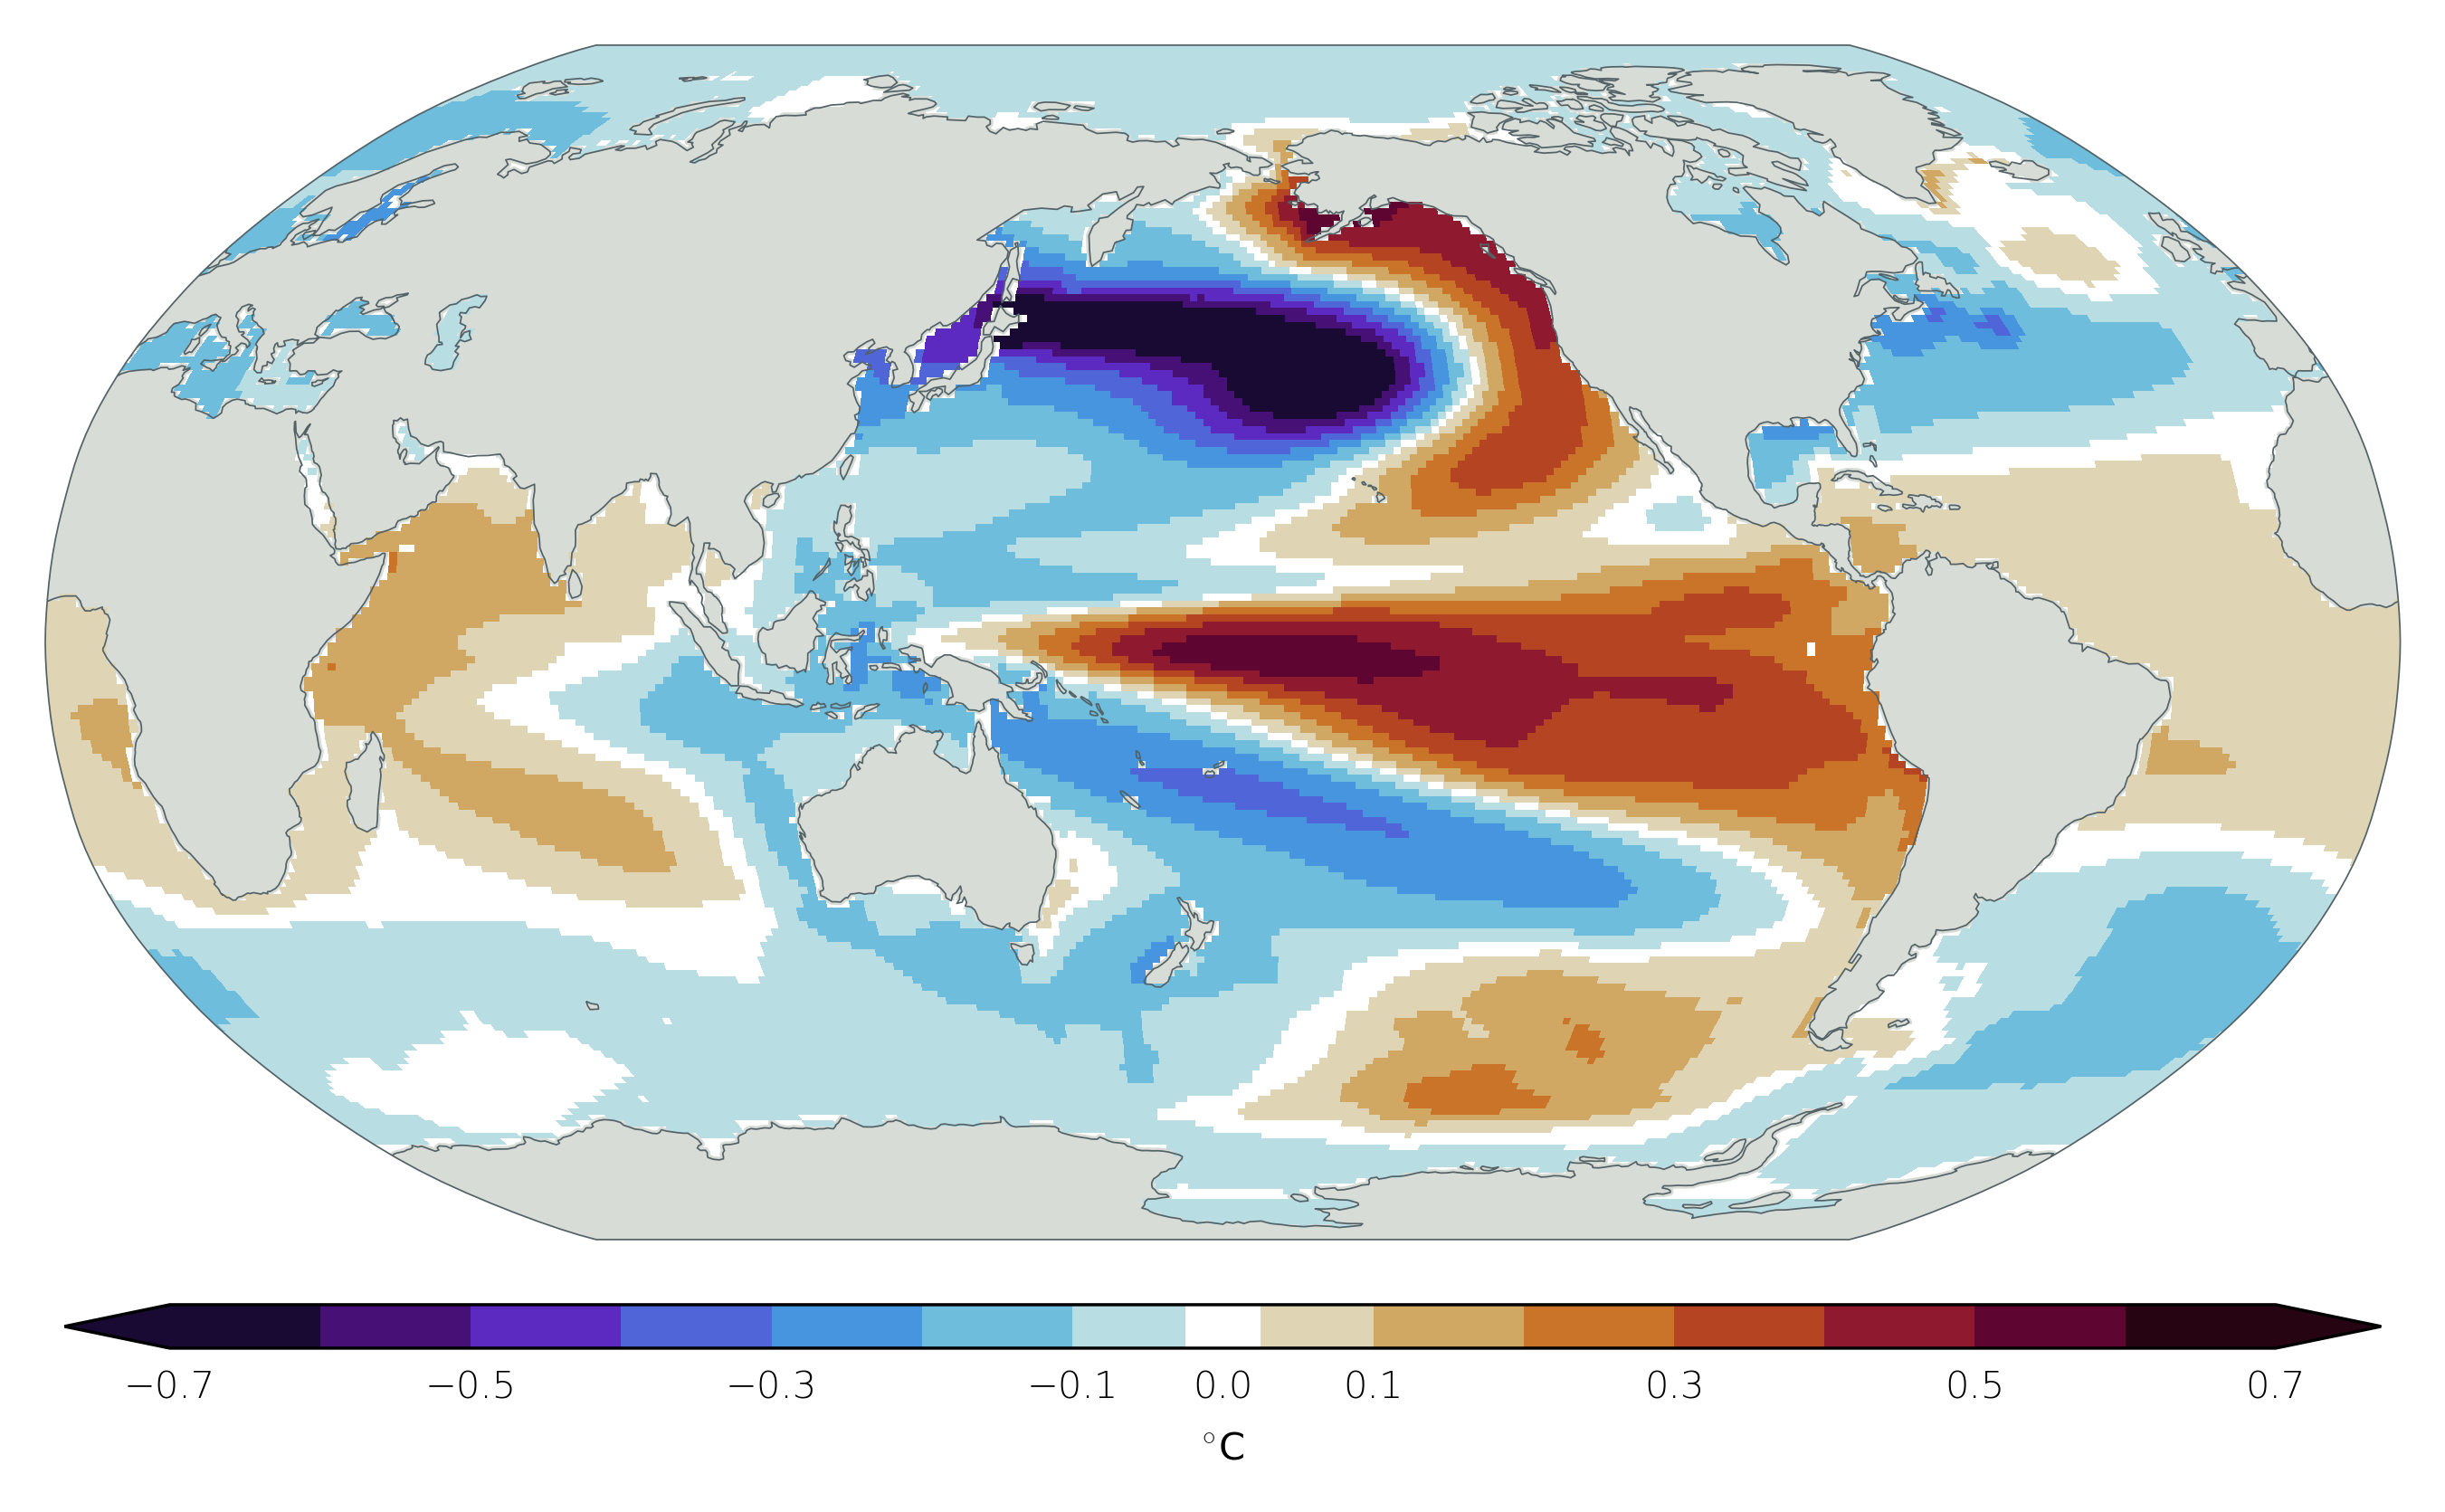

In [107]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.Robinson(central_longitude=180)))

bounds = [-0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0.025, 0.025, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

norm = c.BoundaryNorm(bounds, plt.get_cmap('cmr.fusion_r').N)

ax.coastlines(lw=0.25, color='xkcd:gunmetal')
ax.spines['geo'].set_edgecolor('xkcd:gunmetal')
ax.spines['geo'].set_linewidth(0.25)
ax.add_feature(ct.feature.LAND, color='xkcd:light gray')
ax.pcolormesh(sst_le['lon'], sst_le['lat'], np.mean(pdo_pattern, axis=0), transform=ccrs.PlateCarree(), cmap='cmr.fusion_r', norm=norm)
# ax[i].set_title('Pacific Decadal Oscillation', size=10, pad=3)

cax = plt.axes([0.1, .2, 0.8, 0.02])
cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap='cmr.fusion_r', norm=norm), cax=cax, orientation='horizontal', spacing='proportional', extend='both', ticks=[-0.7, -0.5, -0.3, -0.1, 0, 0.1, 0.3, 0.5, 0.7])
cbar.set_label(r'$^{\circ}$C', size=6, fontweight='normal', color='black')
cbar.ax.tick_params(which='both', labelsize=6, width=0.5, length=0, labelcolor='black')
cbar.outline.set_linewidth(0.5)
cbar.outline.set_color('black')
# cbar.outline.set_visible(False)

plt.subplots_adjust(left=0,
                    bottom=0.25, 
                    right=1, 
                    top=0.8, 
                    wspace=0.25, 
                    hspace=0.4)